In [2]:
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd

In [3]:
Gaia.login(user = "", password="")  # puedes hacerlo como guest si no te registras

job = Gaia.launch_job_async("""
-- GIANTS
SELECT TOP 500
  ra, dec, parallax, parallax_error,
  phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag,
  ruwe, phot_bp_rp_excess_factor, phot_g_mean_flux,
  astrometric_excess_noise, bp_rp, bp_g, g_rp,random_index 
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10
  AND ruwe < 1.4
  AND (phot_bp_mean_mag - phot_rp_mean_mag) >= 0.8
  AND (phot_g_mean_mag - 10 + 5*LOG10(parallax)) <= 2.5
ORDER BY random_index

UNION ALL

-- WDs
SELECT TOP 500
  ra, dec, parallax, parallax_error,
  phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag,
  ruwe, phot_bp_rp_excess_factor, phot_g_mean_flux,
  astrometric_excess_noise, bp_rp, bp_g, g_rp, random_index
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10
  AND ruwe < 1.4
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN -0.5 AND 1.8
  AND (phot_g_mean_mag - 10 + 5*LOG10(parallax)) >= 10
ORDER BY random_index

UNION ALL

-- MS
SELECT TOP 500
  ra, dec, parallax, parallax_error,
  phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag,
  ruwe, phot_bp_rp_excess_factor, phot_g_mean_flux,
  astrometric_excess_noise, bp_rp, bp_g, g_rp, random_index
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10
  AND ruwe < 1.4
  AND NOT (
    ((phot_bp_mean_mag - phot_rp_mean_mag) >= 0.8
     AND (phot_g_mean_mag - 10 + 5*LOG10(parallax)) <= 2.5)
    OR
    ((phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN -0.5 AND 1.8
     AND (phot_g_mean_mag - 10 + 5*LOG10(parallax)) >= 10)
  )
ORDER BY random_index


""")

results = job.get_results()
df = results.to_pandas()
df.head()

INFO: Login to gaia TAP server [astroquery.gaia.core]
401 Error 401:
<!doctype html><html lang="en"><head><title>HTTP Status 401 – Unauthorized</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 401 – Unauthorized</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Bad Credentials</p><p><b>Description</b> The request has not been applied to the target resource because it lacks valid authentication credentials for that resource.</p><hr class="line" /><h3>Apache Tomcat/9.0.102</h3></body></html>


ERROR: Error logging in TAP server [astroquery.gaia.core]


INFO: Query finished. [astroquery.utils.tap.core]


,ra,dec,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,phot_bp_rp_excess_factor,phot_g_mean_flux,astrometric_excess_noise,bp_rp,bp_g,g_rp,random_index
0,80.027527,-49.785186,0.468424,0.012727,13.993294,14.509561,13.325885,0.971992,1.229128,47602.451754,0.000000,1.183676,0.516267,0.667409,329
1,19.826662,33.865898,0.344142,0.024055,14.778735,15.179917,14.204826,0.943659,1.215310,23091.534139,0.000000,0.975091,0.401182,0.573909,532
2,64.880506,-31.088960,0.849927,0.018639,11.515061,12.020891,10.861386,1.368054,1.223699,466575.903749,0.178768,1.159505,0.505830,0.653675,616
3,221.391547,-52.847784,0.183334,0.017172,13.821015,15.180682,12.687241,0.999491,1.403276,55787.957829,0.000000,2.493442,1.359667,1.133775,643
4,88.212522,42.019391,0.717614,0.013189,13.168218,13.620908,12.545147,0.958131,1.225167,101779.386976,0.000000,1.075761,0.452690,0.623071,698


In [4]:
df["BP_RP"] = df["phot_bp_mean_mag"] - df["phot_rp_mean_mag"]
d_pc = 1000.0 / df["parallax"]   # distancia en parsecs (parallax en mas)
df["M_G"] = df["phot_g_mean_mag"] + 5 - 5*np.log10(d_pc)

df.head()

,ra,dec,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,phot_bp_rp_excess_factor,phot_g_mean_flux,astrometric_excess_noise,bp_rp,bp_g,g_rp,random_index,BP_RP,M_G
0,80.027527,-49.785186,0.468424,0.012727,13.993294,14.509561,13.325885,0.971992,1.229128,47602.451754,0.000000,1.183676,0.516267,0.667409,329,1.183676,2.346488
1,19.826662,33.865898,0.344142,0.024055,14.778735,15.179917,14.204826,0.943659,1.215310,23091.534139,0.000000,0.975091,0.401182,0.573909,532,0.975091,2.462424
2,64.880506,-31.088960,0.849927,0.018639,11.515061,12.020891,10.861386,1.368054,1.223699,466575.903749,0.178768,1.159505,0.505830,0.653675,616,1.159505,1.161969
3,221.391547,-52.847784,0.183334,0.017172,13.821015,15.180682,12.687241,0.999491,1.403276,55787.957829,0.000000,2.493442,1.359667,1.133775,643,2.493442,0.137227
4,88.212522,42.019391,0.717614,0.013189,13.168218,13.620908,12.545147,0.958131,1.225167,101779.386976,0.000000,1.075761,0.452690,0.623071,698,1.075761,2.447671


In [5]:
def label_star(row):
    # Enanas blancas: azules y muy débiles
    if (-0.5 <= row.BP_RP <= 1.8) and (row.M_G >= 10):
        return "WD"      # White Dwarf
    # Gigantes: rojas y muy brillantes
    elif (row.BP_RP >= 0.8) and (row.M_G <= 2.5):
        return "Giant"
    # Secuencia principal: todo lo demás
    else:
        return "MS"      # Main Sequence

In [6]:
df["target"] = df.apply(label_star, axis=1)
print(df["target"].value_counts())
df.head()

target
Giant    500
WD       500
MS       500
Name: count, dtype: int64


,ra,dec,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,phot_bp_rp_excess_factor,phot_g_mean_flux,astrometric_excess_noise,bp_rp,bp_g,g_rp,random_index,BP_RP,M_G,target
0,80.027527,-49.785186,0.468424,0.012727,13.993294,14.509561,13.325885,0.971992,1.229128,47602.451754,0.000000,1.183676,0.516267,0.667409,329,1.183676,2.346488,Giant
1,19.826662,33.865898,0.344142,0.024055,14.778735,15.179917,14.204826,0.943659,1.215310,23091.534139,0.000000,0.975091,0.401182,0.573909,532,0.975091,2.462424,Giant
2,64.880506,-31.088960,0.849927,0.018639,11.515061,12.020891,10.861386,1.368054,1.223699,466575.903749,0.178768,1.159505,0.505830,0.653675,616,1.159505,1.161969,Giant
3,221.391547,-52.847784,0.183334,0.017172,13.821015,15.180682,12.687241,0.999491,1.403276,55787.957829,0.000000,2.493442,1.359667,1.133775,643,2.493442,0.137227,Giant
4,88.212522,42.019391,0.717614,0.013189,13.168218,13.620908,12.545147,0.958131,1.225167,101779.386976,0.000000,1.075761,0.452690,0.623071,698,1.075761,2.447671,Giant


In [7]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=["random_index"])

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Ejemplo: define tus features (agrega todas las que quieras probar)
features = df.columns.difference(["target","random_index"])  # todas menos estas
X = df[features].copy()
y = df["target"].copy()           # "MS", "Giant", "WD"

# codifica y para métricas como ROC multi-clase
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

# Primero sacamos el conjunto de prueba (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# De lo que quedó (80%), hacemos split para validación (20% de 80% = 16% del total)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=42
)

print("Tamaños:")
print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)

Tamaños:
Train: (960, 16)
Val:   (240, 16)
Test:  (300, 16)


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    n_estimators=500, max_depth=None, n_jobs=-1, random_state=42, class_weight="balanced_subsample"
)
rf_base.fit(X_train, y_train)

importances = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Importancia (RF):\n", importances)

# Elige K según caída de importancias o fija un K (p.ej., 5)
K = min(6, X_train.shape[1])
topK = importances.index[:K].tolist()
print("Top-K features:", topK)

Importancia (RF):
 M_G                         0.316703
parallax                    0.140474
phot_rp_mean_mag            0.106992
parallax_error              0.088246
phot_g_mean_mag             0.083785
phot_g_mean_flux            0.082242
bp_g                        0.054870
BP_RP                       0.034056
bp_rp                       0.032203
phot_bp_mean_mag            0.024989
g_rp                        0.016989
phot_bp_rp_excess_factor    0.012983
astrometric_excess_noise    0.002129
ruwe                        0.001485
dec                         0.000972
ra                          0.000883
dtype: float64
Top-K features: ['M_G', 'parallax', 'phot_rp_mean_mag', 'parallax_error', 'phot_g_mean_mag', 'phot_g_mean_flux']


In [11]:
from sklearn.feature_selection import RFE

rf_for_rfe = RandomForestClassifier(
    n_estimators=400, max_depth=None, n_jobs=-1, random_state=7, class_weight="balanced_subsample"
)
# Número de features objetivo (puedes barrer varios valores)
n_select = K  # usa el K que definiste arriba, o prueba una lista [3,4,5,...]
rfe = RFE(estimator=rf_for_rfe, n_features_to_select=n_select, step=1)
rfe.fit(X_train, y_train)

selected_mask = rfe.support_
selected_features = X_train.columns[selected_mask].tolist()
print("RFE selected:", selected_features)

RFE selected: ['M_G', 'parallax', 'parallax_error', 'phot_g_mean_flux', 'phot_g_mean_mag', 'phot_rp_mean_mag']


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def eval_model(clf, X_tr, y_tr, X_te, y_te):
    # CV
    acc_cv = cross_val_score(clf, X_tr, y_tr, cv=cv, scoring="accuracy").mean()
    f1_cv  = cross_val_score(clf, X_tr, y_tr, cv=cv, scoring="f1_macro").mean()
    # Fit + test
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    f1  = f1_score(y_te, y_pred, average="macro")
    # ROC-AUC one-vs-rest (requiere predict_proba)
    if hasattr(clf, "predict_proba"):
        y_bin_te = label_binarize(y_te, classes=np.arange(len(le.classes_)))
        y_proba  = clf.predict_proba(X_te)
        auc = roc_auc_score(y_bin_te, y_proba, average="macro", multi_class="ovr")
    else:
        auc = np.nan
    return acc_cv, f1_cv, acc, f1, auc, confusion_matrix(y_te, y_pred)

# Modelo base a comparar (puedes repetir con SVM/KNN también)
rf_final = RandomForestClassifier(
    n_estimators=600, max_depth=None, n_jobs=-1, random_state=123, class_weight="balanced_subsample"
)

# (A) Todas las variables
metrics_all = eval_model(rf_final, X_train, y_train, X_test, y_test)

# (B) Solo variables seleccionadas por RFE
X_train_sel = X_train[selected_features]
X_test_sel  = X_test[selected_features]
metrics_sel = eval_model(rf_final, X_train_sel, y_train, X_test_sel, y_test)

print("\n=== Resultados RF (todas) ===")
print(f"CV Acc: {metrics_all[0]:.3f} | CV Macro-F1: {metrics_all[1]:.3f} | Test Acc: {metrics_all[2]:.3f} | Test Macro-F1: {metrics_all[3]:.3f} | Test ROC-AUC: {metrics_all[4]:.3f}")
print("Matriz de confusión (test):\n", metrics_all[5])

print("\n=== Resultados RF (RFE) ===")
print(f"CV Acc: {metrics_sel[0]:.3f} | CV Macro-F1: {metrics_sel[1]:.3f} | Test Acc: {metrics_sel[2]:.3f} | Test Macro-F1: {metrics_sel[3]:.3f} | Test ROC-AUC: {metrics_sel[4]:.3f}")
print("Matriz de confusión (test):\n", metrics_sel[5])



=== Resultados RF (todas) ===
CV Acc: 0.996 | CV Macro-F1: 0.996 | Test Acc: 1.000 | Test Macro-F1: 1.000 | Test ROC-AUC: 1.000
Matriz de confusión (test):
 [[100   0   0]
 [  0 100   0]
 [  0   0 100]]

=== Resultados RF (RFE) ===
CV Acc: 0.981 | CV Macro-F1: 0.981 | Test Acc: 0.970 | Test Macro-F1: 0.970 | Test ROC-AUC: 0.999
Matriz de confusión (test):
 [[100   0   0]
 [  0  94   6]
 [  0   3  97]]


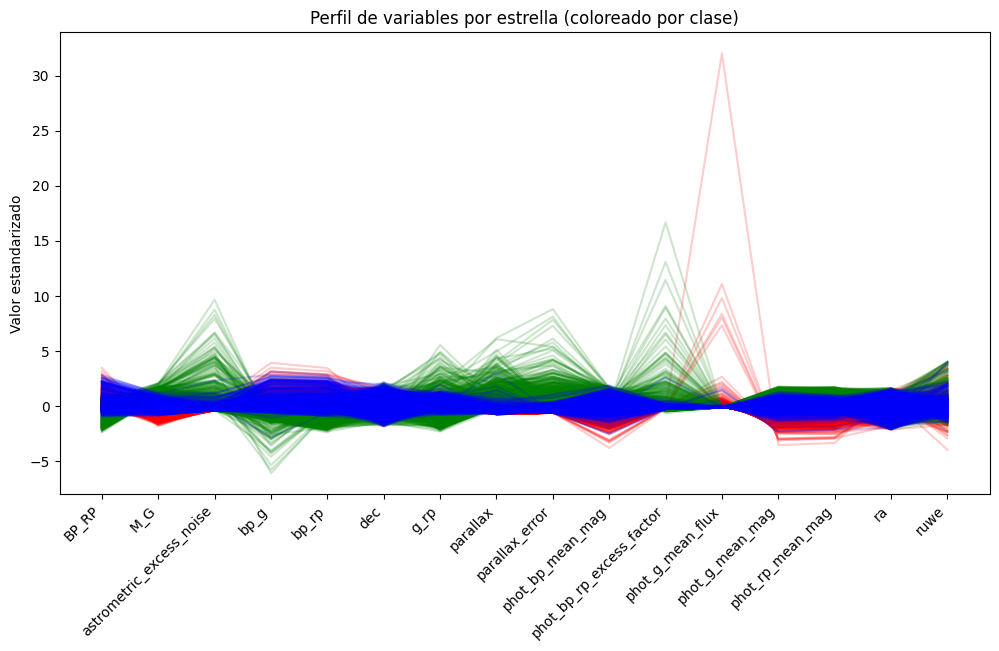

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Escalamos para que todas las variables estén en la misma escala
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X), 
    columns=X.columns, 
    index=X.index
)

# Graficar cada estrella como una línea
plt.figure(figsize=(12,6))
for i in range(len(X_scaled)):
    plt.plot(X_scaled.columns, X_scaled.iloc[i], 
             color=("red" if df["target"].iloc[i]=="Giant" 
                    else "blue" if df["target"].iloc[i]=="MS" 
                    else "green"), 
             alpha=0.2)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Valor estandarizado")
plt.title("Perfil de variables por estrella (coloreado por clase)")
plt.show()
